<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [21]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

   Resolving package versions...
    Updating `C:\Users\mrclo\Documents\JuliaScripts\BME-502-2025-homeworks\Project.toml`
  [276daf66] + SpecialFunctions v2.5.0
  No Changes to `C:\Users\mrclo\Documents\JuliaScripts\BME-502-2025-homeworks\Manifest.toml`


In [22]:
import SpecialFunctions
import Plots

In [23]:
function pdf_beta(α,β,x)
    val = SpecialFunctions.gamma(α+β) / (SpecialFunctions.gamma(α) * SpecialFunctions.gamma(β)) * x^(α-1) * (1-x)^(β-1)
    return val 
end

pdf_beta (generic function with 1 method)

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

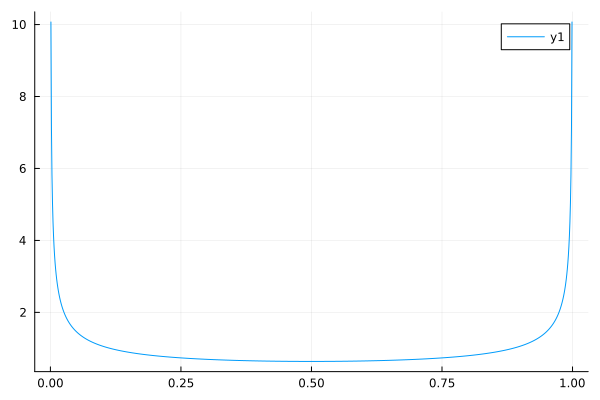

In [24]:
x = 0:0.001:1
α=0.5
β=0.5
pdf_range(x) = pdf_beta(α,β,x)
pdf = pdf_range.(x)
Plots.plot(x,pdf)

The shape of the beta distribution is a U-shape with vertical asymptotes at x=0 and x=1. 

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

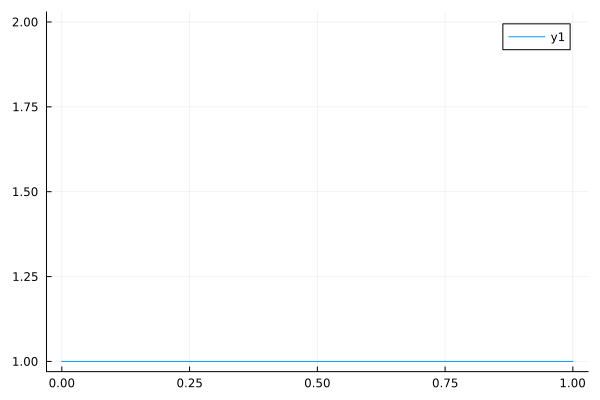

In [25]:
α=1
β=1
# pdf_range(x) = pdf_beta(α,β,x)
pdf = pdf_range.(x)
Plots.plot(x,pdf)

This beta distribution is perfectly flat, equal to 1 at all values between 0 and 1.

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

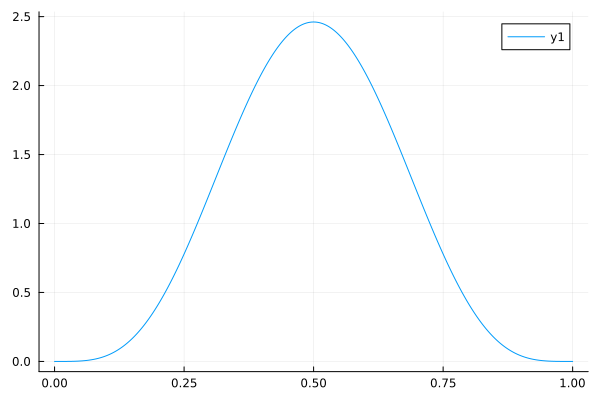

In [26]:
α=5
β=5
# pdf_range(x) = pdf_beta(α,β,x)
pdf = pdf_range.(x)
Plots.plot(x,pdf)

This beta distribution takes on a bell-shaped curve, almost like a Gaussian with mean of 0.5. 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 6 heads in 10 trials.

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

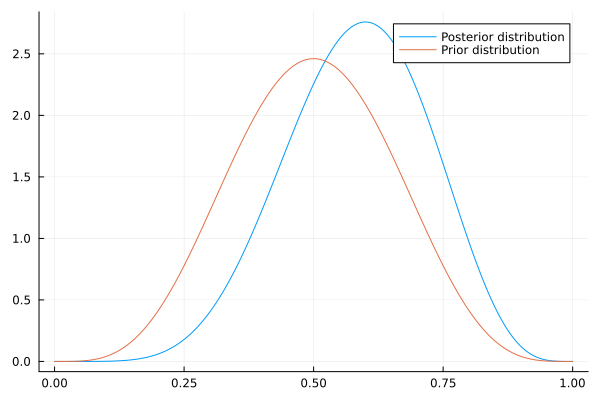

In [27]:
N=10
k=6
α=k+1
β=N-k+1
pdf_range(x) = pdf_beta(α,β,x)
pdf_new = pdf_range.(x)
Plots.plot(x,pdf_new,label="Posterior distribution")
Plots.plot!(x,pdf,label="Prior distribution")

The distribution shifted slightly up compared to the prior, due to observing an uneven result distribution. The most likely probability is now 0.6, rather than 0.5 in the prior. 

# Question 2
### (LSQFIT) Complete the exercises 



### 2.1 


The exponential model is given by: 
$$
f(x) = 3* e^x
$$

where x is defined as the range 0:0.1:1, and y is the experiment data with a measurement error with a standard deviation of 0.2. Follow the notebook LSQFIT_class.ipynb and use it as a template to
1) Scatter plot of x vs. experiment data with fitted model (using a initial guess of the parameters of your chosing).
2) Calculate the covariance matrix from the Hessian of Chi-square.











In [28]:
Pkg.add(["LsqFit","ForwardDiff","Statistics","LinearAlgebra"])
using LsqFit, ForwardDiff, Statistics, LinearAlgebra

   Resolving package versions...
  No Changes to `C:\Users\mrclo\Documents\JuliaScripts\BME-502-2025-homeworks\Project.toml`
  No Changes to `C:\Users\mrclo\Documents\JuliaScripts\BME-502-2025-homeworks\Manifest.toml`


In [29]:
x = 0:0.1:1
f(x) = 3*exp(x)
y_true = f.(x)
sigma_y = 0.2
y_exp = y_true + sigma_y*randn(length(y_true))

model(x,p) = p[1] .* exp.(p[2] .* x)
fit = curve_fit(model, x, y_exp, [1.5,1.5])
fit.param

2-element Vector{Float64}:
 3.194102863340826
 0.8814090649269711

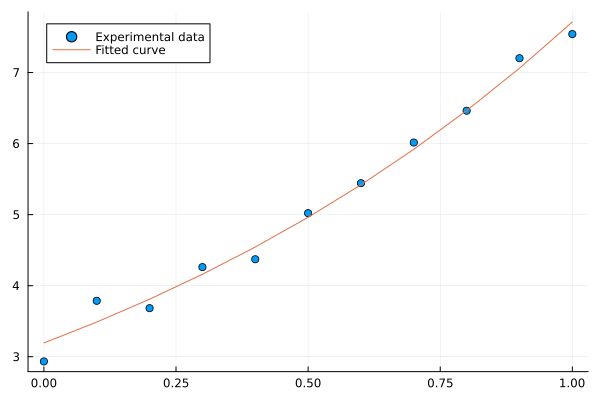

In [30]:
y_fit = fit.param[1] .* exp.(fit.param[2] .* x)
Plots.scatter(x,y_exp, label = "Experimental data")
Plots.plot!(x,y_fit, label = "Fitted curve")

In [31]:
# function res(u, (x,y))
#     return u[1] .* exp.(u[2] .* x) .- y
# end
# function chi2(u,(x,y))
#     sum(res(u,(x,y)) .^2 ./ 0.1^2)
# end
# ourchi2(u) = chi2(u,(x,y_exp))
# # chi2(fit.param,(x,y_exp))
# h = ForwardDiff.hessian(ourchi2,fit.param)
# cov_mat = sqrt(inv(2*h))
covar_mat = estimate_covar(fit)
sqrt_covar_mat = sqrt.(covar_mat[diagind(covar_mat)])


2-element Vector{Float64}:
 0.07896744693299051
 0.034050521957969725

In [19]:
# cov_mat[2,2]

### 2.2 
Similar to  2.1, repeat the procedure 500 times and calculate the standard deviation of the fitted parameters.  Then compare this standard deviation to the standard deviations that you estimated from the covariance matrix from each fit (you have to think a little about how you average the covariance matrix - give a rationale).

In [32]:
fit1_list = []
fit2_list = []

param1_list = []
param2_list = []

for i in 1:500
    y_exp = y_true + sigma_y*randn(length(y_true))
    fit = curve_fit(model, x, y_exp, [1.5,1.5])
    # h = ForwardDiff.hessian(ourchi2,fit.param)
    # cov_mat = sqrt(inv(2*h))
    
    covar_mat = estimate_covar(fit)
    sqrt_covar_mat = sqrt.(covar_mat[diagind(covar_mat)])

    push!(fit1_list,fit.param[1])
    push!(fit2_list,fit.param[2])

    push!(param1_list,sqrt_covar_mat[1])
    push!(param2_list,sqrt_covar_mat[2])
end
RMS(x) = sqrt(mean(x.^2))
print(std(fit1_list),"\n")
print(mean(param1_list),"\n\n")

print(std(fit2_list),"\n")
print(RMS(param2_list),"\n\n")



0.08597966372322377
0.08417948123469736

0.038656731057728974
0.03879220731729586



I used the root mean square to average the diagonal values of the covariance matrix, as they should correspond to the standard deviation of those parameters, which can't be directly added. Instead, they must be squared in order to add the varainces together and average those, and then take the square root to recover the standard deviation.